# **Project #3: Reddit NLP - CVEC/NB Model
### DestinyTheGame vs. raidsecrets
*By Daniel Preston McBride*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import time

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
reddit = pd.read_csv('../data/reddit_data.csv')
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3838 non-null   int64 
 1   title      3838 non-null   object
 2   selftext   3838 non-null   object
dtypes: int64(1), object(2)
memory usage: 90.1+ KB


---
### Fitting X and y on train test split

In [3]:
X = reddit['selftext']
y = reddit['subreddit']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

---
### Creating pipeline with transformer and estimater.  Passing the pipeline with designated hyperparameters through gridsearchCV.  Utilized an appending DataFrame to compare adjustments to hyperparameters for each model ran.
*Referenced from 6.03-lesson-random-forest*

In [5]:
count = 0
model_params = {}

In [13]:
count = count
model_params = model_params

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,4)],
    'cvec__max_features': [3000],
    'cvec__max_df': [0.82],
    'cvec__min_df': [5]
}

gs = GridSearchCV(estimator=pipe,
                 param_grid=params,
                 cv=5,
                 verbose=1)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['best_score'] = gs.best_score_
gs.best_params_['train_score'] = gs.score(X_train, y_train)
gs.best_params_['test_score'] = gs.score(X_test, y_test)
model_params[f'model_{count}'] = gs.best_params_

model_df = pd.DataFrame.from_dict(model_params, orient='index')
model_df

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,cvec__max_df,cvec__max_features,cvec__min_df,cvec__ngram_range,cvec__stop_words,best_score,train_score,test_score
model_1,0.83,2750,5,"(1, 2)",english,0.811985,0.838794,0.801215
model_2,0.80,3000,5,"(1, 3)",english,0.813100,0.838421,0.802083
model_3,0.80,3000,5,"(1, 4)",english,0.813843,0.838794,0.801215
model_4,0.82,3000,5,"(1, 4)",english,0.813843,0.838794,0.801215
model_5,0.82,3000,5,"(1, 4)",english,0.813843,0.838794,0.801215
model_6,0.82,3000,5,"(1, 4)",english,0.813843,0.838794,0.801215


In [17]:
gs.best_params_

{'cvec__max_df': 0.82,
 'cvec__max_features': 3000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 4),
 'cvec__stop_words': 'english',
 'best_score': 0.8138432569763175,
 'train_score': 0.8387937453462397,
 'test_score': 0.8012152777777778}

---
### Checking scores against the baseline score; Visualizing probability metrics with confusion matrix

In [7]:
y.value_counts(normalize=True)

1    0.505732
0    0.494268
Name: subreddit, dtype: float64

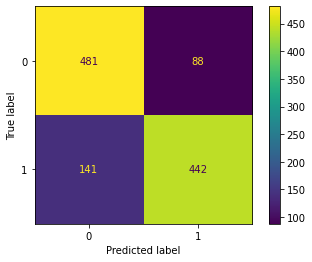

In [16]:
plot_confusion_matrix(gs, X_test, y_test);